In [42]:
import spatialdata as sd
from spatialdata_io import visium, visium_hd, xenium
import spatialdata as sd
import spatialdata_plot as sdp
from spatialdata_io import visium, visium_hd, xenium
import matplotlib.pyplot as plt
import os
import requests
import tarfile
from IPython.display import display, HTML
import scipy
import pandas as pd

In [20]:
data_path = "./ELIXIR-SCO-spatial-omics/data/"
folder_path = data_path+"visium_2.1.0_2_io_subset/"

# Create the folder path
try:
    os.makedirs(folder_path, exist_ok=True)
    print(f"Folder path '{folder_path}' created successfully.")
except Exception as e:
    print(f"An error occurred while creating the folder path: {e}")
    

urls = {
    "filtered_feature_bc_matrix.h5": "https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5",
    "spatial.tar.gz":                "https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_spatial.tar.gz"
}

for filename, url in urls.items():
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join(folder_path, filename), 'wb') as f:
            f.write(response.content)
        print(f"{filename} successfully downloaded")
    else:
        print(f"Failed to download {filename}, status code: {response.status_code}")

# Define the file paths
tar_file_path = os.path.join(folder_path, "spatial.tar.gz")
extract_path = folder_path

# Extract the tar.gz file
try:
    with tarfile.open(tar_file_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
    print(f"Extracted files to: {extract_path}")
    print("Contents:", os.listdir(extract_path))
except Exception as e:
    print(f"An error occurred while extracting the file: {e}")

Folder path './ELIXIR-SCO-spatial-omics/data/visium_2.1.0_2_io_subset/' created successfully.
filtered_feature_bc_matrix.h5 successfully downloaded
spatial.tar.gz successfully downloaded
['filtered_feature_bc_matrix.h5', 'spatial.tar.gz']
Extracted files to: ./ELIXIR-SCO-spatial-omics/data/visium_2.1.0_2_io_subset/
Contents: ['filtered_feature_bc_matrix.h5', 'spatial', 'spatial.tar.gz']


In [22]:
#Visium will error if dataset_id is not passed explicitly
sdata_visium = visium(folder_path, dataset_id='Glioblastoma')


INFO     reading ELIXIR-SCO-spatial-omics\data\visium_2.1.0_2_io_subset\filtered_feature_bc_matrix.h5              


c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\models\models.py:1053: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


In [ ]:
# The above errors indicate that the variable names are not unique, so we make them unique
sdata_visium.tables["table"].var_names_make_unique()  # modifies in-place

In [28]:
sdata_visium

SpatialData object
├── Images
│     ├── 'Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     └── 'Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        Glioblastoma_hires_image (Images), Glioblastoma (Shapes)
    ▸ 'downscaled_lowres', with elements:
        Glioblastoma_lowres_image (Images), Glioblastoma (Shapes)
    ▸ 'global', with elements:
        Glioblastoma_hires_image (Images), Glioblastoma_lowres_image (Images), Glioblastoma (Shapes)

In [29]:
sdata_visium["table"]

AnnData object with n_obs × n_vars = 5756 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

In [31]:
data_path = "./ELIXIR-SCO-spatial-omics/data/"
folder_path = data_path+"visium_hd_3.0.0_io_subset/"

# Create the folder path
try:
    os.makedirs(folder_path, exist_ok=True)
    print(f"Folder path '{folder_path}' created successfully.")
except Exception as e:
    print(f"An error occurred while creating the folder path: {e}")
    

urls = {
    "Visium_HD_Mouse_Small_Intestine_feature_slice.h5": "https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_feature_slice.h5",
    "Visium_HD_Mouse_Small_Intestine_molecule_info.h5": "https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_molecule_info.h5",
    "Visium_HD_Mouse_Small_Intestine_spatial.tar.gz":   "https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_spatial.tar.gz",
    "Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz": "https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz"
}

for filename, url in urls.items():
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join(folder_path, filename), 'wb') as f:
            f.write(response.content)
        print(f"{filename} successfully downloaded")
    else:
        print(f"Failed to download {filename}, status code: {response.status_code}")

# Define the file paths
tar_file_path = os.path.join(folder_path, "Visium_HD_Mouse_Small_Intestine_spatial.tar.gz")
extract_path = folder_path

# Extract the tar.gz file
try:
    with tarfile.open(tar_file_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
    print(f"Extracted files to: {extract_path}")
    print("Contents:", os.listdir(extract_path))
except Exception as e:
    print(f"An error occurred while extracting the file: {e}")
    

# Define the file paths
tar_file_path = os.path.join(folder_path, "Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz")
extract_path = folder_path

# Extract the tar.gz file
try:
    with tarfile.open(tar_file_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
    print(f"Extracted files to: {extract_path}")
    print("Contents:", os.listdir(extract_path))
except Exception as e:
    print(f"An error occurred while extracting the file: {e}")

Folder path './ELIXIR-SCO-spatial-omics/data/visium_hd_3.0.0_io_subset/' created successfully.
Visium_HD_Mouse_Small_Intestine_feature_slice.h5 successfully downloaded
Visium_HD_Mouse_Small_Intestine_molecule_info.h5 successfully downloaded
Visium_HD_Mouse_Small_Intestine_spatial.tar.gz successfully downloaded
Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz successfully downloaded
Extracted files to: ./ELIXIR-SCO-spatial-omics/data/visium_hd_3.0.0_io_subset/
Contents: ['spatial', 'Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz', 'Visium_HD_Mouse_Small_Intestine_feature_slice.h5', 'Visium_HD_Mouse_Small_Intestine_molecule_info.h5', 'Visium_HD_Mouse_Small_Intestine_spatial.tar.gz']
Extracted files to: ./ELIXIR-SCO-spatial-omics/data/visium_hd_3.0.0_io_subset/
Contents: ['binned_outputs', 'spatial', 'Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz', 'Visium_HD_Mouse_Small_Intestine_feature_slice.h5', 'Visium_HD_Mouse_Small_Intestine_molecule_info.h5', 'Visium_HD_Mouse_S

In [33]:
sdata_visium_hd = visium_hd(folder_path)
for table_name, adata in sdata_visium_hd.tables.items():
    print(f"Processing table: {table_name}")
    adata.var_names_make_unique()
sdata_visium_hd

c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\ethan\AppData\Local\Temp\ipykernel_16212\1748540362.py:1: UserWarning: No full resolution image found. If incorrect, please specify the path in the `fullres_image_file` parameter when calling the `visium_hd` reader function.
  sdata_visium_hd = visium_hd(folder_path)


Processing table: square_002um
Processing table: square_008um
Processing table: square_016um


SpatialData object
├── Images
│     ├── 'Visium_HD_Mouse_Small_Intestine_hires_image': DataArray[cyx] (3, 5575, 6000)
│     └── 'Visium_HD_Mouse_Small_Intestine_lowres_image': DataArray[cyx] (3, 558, 600)
├── Shapes
│     ├── 'Visium_HD_Mouse_Small_Intestine_square_002um': GeoDataFrame shape: (5479660, 1) (2D shapes)
│     ├── 'Visium_HD_Mouse_Small_Intestine_square_008um': GeoDataFrame shape: (351817, 1) (2D shapes)
│     └── 'Visium_HD_Mouse_Small_Intestine_square_016um': GeoDataFrame shape: (91033, 1) (2D shapes)
└── Tables
      ├── 'square_002um': AnnData (5479660, 19059)
      ├── 'square_008um': AnnData (351817, 19059)
      └── 'square_016um': AnnData (91033, 19059)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        Visium_HD_Mouse_Small_Intestine_hires_image (Images), Visium_HD_Mouse_Small_Intestine_square_002um (Shapes), Visium_HD_Mouse_Small_Intestine_square_008um (Shapes), Visium_HD_Mouse_Small_Intestine_square_016um (Shapes)
    ▸ 'downscaled_lowres'

In [34]:
adata = sdata_visium["table"]
adata

AnnData object with n_obs × n_vars = 5756 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

In [35]:
adata.to_df()

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,MT-ND2,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
AACAATGGAACCACAT-1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,...,73.0,138.0,320.0,308.0,266.0,63.0,429.0,38.0,14.0,233.0
AACAATGTGCTCCGAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,31.0,43.0,52.0,106.0,29.0,34.0,64.0,12.0,12.0,41.0
AACACCAGCCTACTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,15.0,16.0,18.0,28.0,16.0,8.0,14.0,5.0,8.0,13.0
AACACCATTCGCATAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,54.0,104.0,283.0,340.0,147.0,45.0,323.0,17.0,9.0,168.0
AACACCGAATGTCTCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,153.0,250.0,342.0,632.0,236.0,183.0,395.0,71.0,14.0,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTGGCCTGTAGCGG-1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,29.0,39.0,181.0,173.0,163.0,14.0,323.0,19.0,6.0,123.0
TGTTGGTGCGCACGAG-1,0.0,1.0,0.0,0.0,0.0,1.0,42.0,2.0,0.0,1.0,...,76.0,103.0,259.0,298.0,181.0,60.0,344.0,22.0,5.0,181.0
TGTTGGTGCGCTTCGC-1,0.0,1.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,1.0,...,53.0,97.0,367.0,281.0,249.0,36.0,392.0,32.0,12.0,233.0
TGTTGGTGCGGAATCA-1,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,0.0,0.0,...,12.0,39.0,172.0,102.0,148.0,8.0,246.0,8.0,8.0,63.0


In [36]:
# Information on Genes (variables)
adata.var

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38
...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38
MT-ND4,ENSG00000198886,Gene Expression,GRCh38
MT-ND5,ENSG00000198786,Gene Expression,GRCh38
MT-ND6,ENSG00000198695,Gene Expression,GRCh38


In [37]:
# Information on cells (observations)
adata.obs

,in_tissue,array_row,array_col,spot_id,region
AACAATGGAACCACAT-1,1,54,32,0,Glioblastoma
AACAATGTGCTCCGAG-1,1,98,158,1,Glioblastoma
AACACCAGCCTACTCG-1,1,31,39,2,Glioblastoma
AACACCATTCGCATAC-1,1,53,139,3,Glioblastoma
AACACCGAATGTCTCA-1,1,34,176,4,Glioblastoma
...,...,...,...,...,...
TGTTGGCCTGTAGCGG-1,1,40,78,5751,Glioblastoma
TGTTGGTGCGCACGAG-1,1,24,108,5752,Glioblastoma
TGTTGGTGCGCTTCGC-1,1,37,127,5753,Glioblastoma
TGTTGGTGCGGAATCA-1,1,83,87,5754,Glioblastoma


In [38]:
#Unstructured data
adata.uns

OrderedDict([('spatial',
              {'Glioblastoma': {'metadata': {'chemistry_description': 'Visium V5 Slide',
                 'software_version': 'spaceranger-2.1.0'}}}),
             ('spatialdata_attrs',
              {'region': 'Glioblastoma',
               'region_key': 'region',
               'instance_key': 'spot_id'})])

In [40]:
#Convert sparse to dense 
obs_df = adata.obs
dense_array = adata.X.toarray() if scipy.sparse.issparse(adata.X) else adata.X

INFO     Rasterizing image for faster rendering.                                                                   


c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `Glioblastoma` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     Rasterizing image for faster rendering.                                                                   


c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `Glioblastoma` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     Rasterizing image for faster rendering.                                                                   


c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `Glioblastoma` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     Rasterizing image for faster rendering.                                                                   


c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `Glioblastoma` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     Rasterizing image for faster rendering.                                                                   


c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `Glioblastoma` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     Rasterizing image for faster rendering.                                                                   


c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `Glioblastoma` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


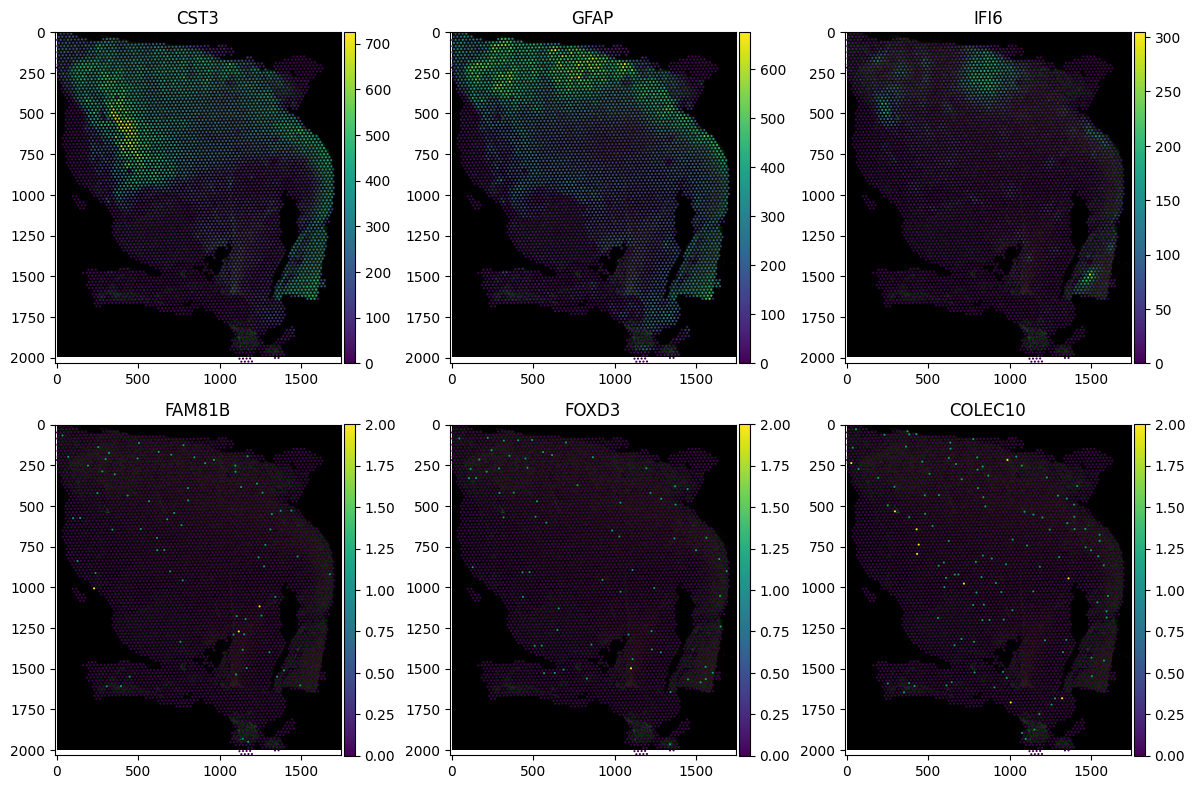

In [ ]:
#Visium Plots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for idx, gene in enumerate(["CST3", "GFAP", "IFI6", "FAM81B", "FOXD3", "COLEC10"]):
    (
        sdata_visium.pl.render_images()
        .pl.render_shapes(color=f"{gene}")
        .pl.show("downscaled_hires", ax=axs[idx // 3, idx % 3], title=gene)
    )

fig.tight_layout()

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `Glioblastoma` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


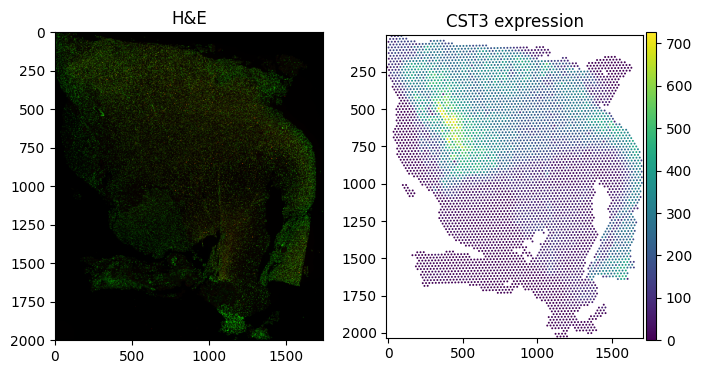

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sdata_visium.pl.render_images().pl.show("downscaled_hires", ax=axs[0], title="H&E")

sdata_visium.pl.render_shapes(color="CST3").pl.show(
    "downscaled_hires", ax=axs[1], title="CST3 expression"
)

<xarray.DataArray 'image' (c: 3, y: 5575, x: 6000)> Size: 100MB
dask.array<transpose, shape=(3, 5575, 6000), dtype=uint8, chunksize=(3, 5575, 6000), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 45kB 0.5 1.5 2.5 3.5 ... 5.572e+03 5.574e+03 5.574e+03
  * x        (x) float64 48kB 0.5 1.5 2.5 3.5 ... 5.998e+03 5.998e+03 6e+03
Attributes:
    transform:  {'downscaled_hires': Identity , 'global': Scale (x, y)\n    [...

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


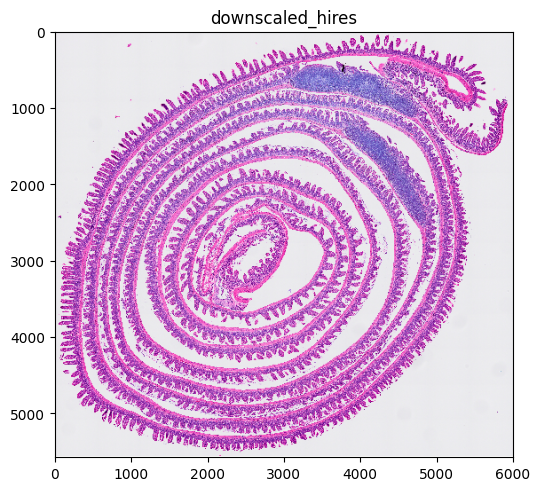

In [46]:
#Visium HD plots
image_l = sdata_visium_hd["Visium_HD_Mouse_Small_Intestine_hires_image"]
display(image_l)
sdata_visium_hd.pl.render_images().pl.show("downscaled_hires")

c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


Processing table: square_002um
Processing table: square_008um
Processing table: square_016um
All variable names are unique in square_002um.
All variable names are unique in square_008um.
All variable names are unique in square_016um.


c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `Visium_HD_Mouse_Small_Intestine_square_002um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `square_002um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:105: UserWarning: Key `Visium_HD_Mouse_Small_Intestine_square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
c:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\spatialdata\_core\_elements.py:125: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), sel

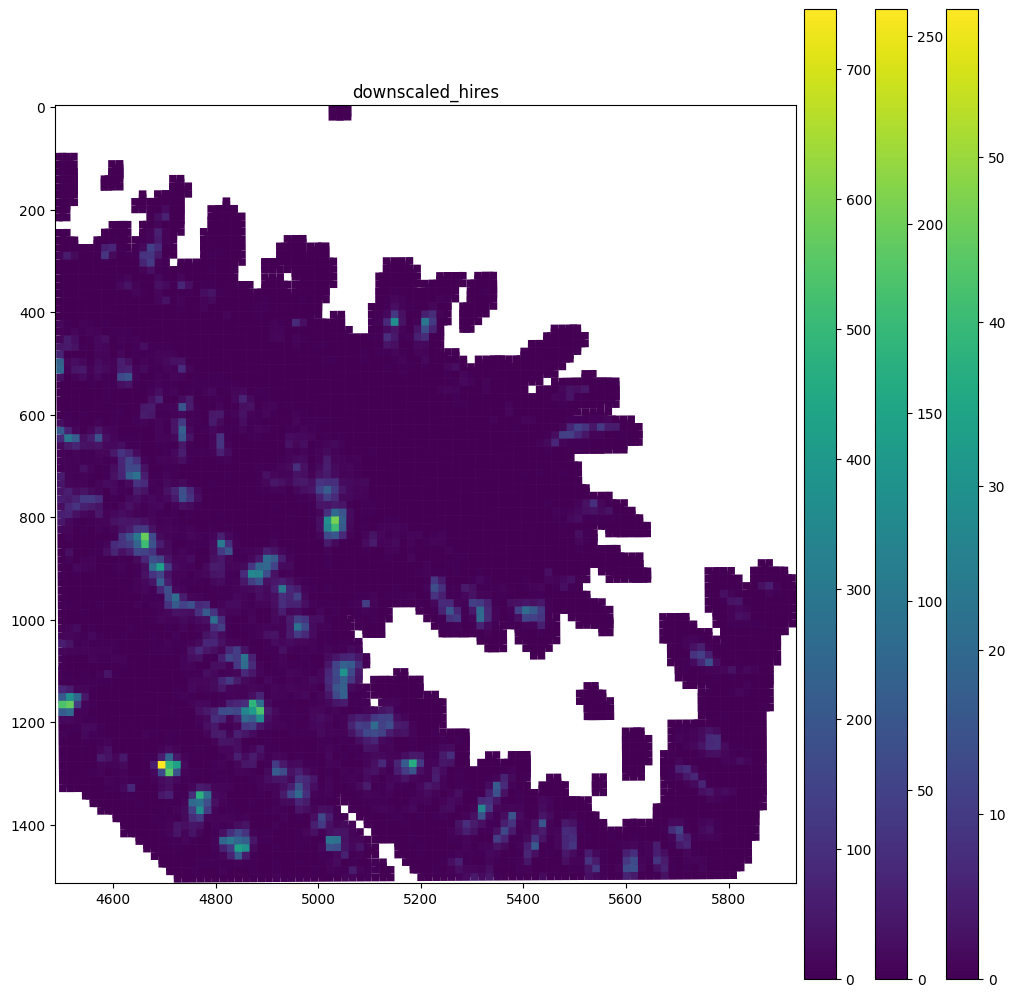

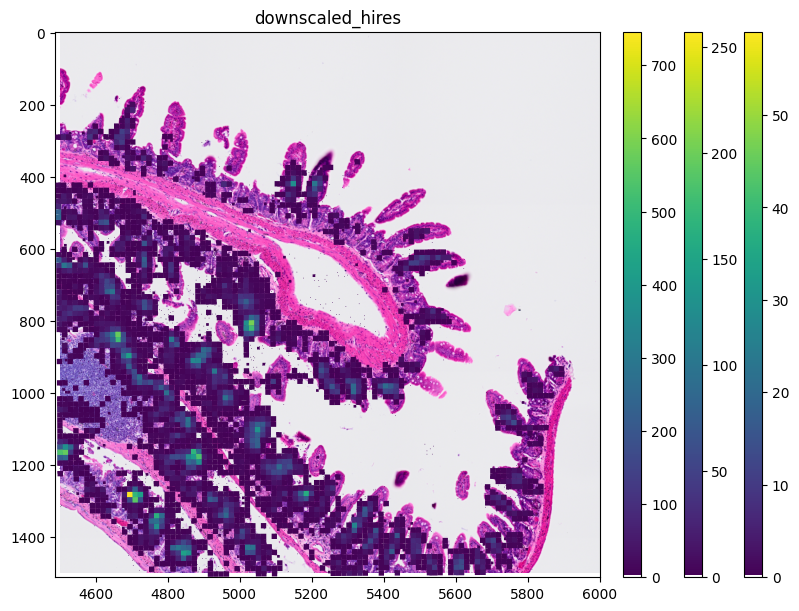

In [47]:

# Access the specific AnnData table
adata_table3 = sdata_visium_hd.tables["square_008um"]  # Replace "table_name" with the actual table name

# Make variable names unique
adata_table3.var_names_make_unique()

# Reassign the updated table back to the SpatialData object (optional if you need to reuse it)
sdata_visium_hd.tables["square_008um"] = adata_table3


sdata_visium_hd_crop = sdata_visium_hd.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[4500, 0],
    max_coordinate=[6000, 1500],
    target_coordinate_system="downscaled_hires",
)


for table_name, adata in sdata_visium_hd_crop.tables.items():
    print(f"Processing table: {table_name}")
    adata.var_names_make_unique()
    
for table_name, adata in sdata_visium_hd_crop.tables.items():
    duplicates = adata.var.index[adata.var.index.duplicated()]
    if duplicates.empty:
        print(f"All variable names are unique in {table_name}.")
    else:
        print(f"Duplicate variable names still exist in {table_name}: {duplicates}")
        
sdata_visium_hd_crop.pl.render_shapes(color="Igha", method="matplotlib").pl.show(
    "downscaled_hires", figsize=(10, 10)
)

from spatialdata_plot.pl.utils import set_zero_in_cmap_to_transparent

cmap = set_zero_in_cmap_to_transparent(plt.cm.viridis)
cmap

sdata_visium_hd_crop.pl.render_images().pl.render_shapes(
    color="Igha", method="matplotlib", cmap=cmap
).pl.show("downscaled_hires", figsize=(8, 6))